In [1]:
# Test migration history reconstruction on Gundem et. al. Neuroblastoma data

import sys
import os
import seaborn as sns

repo_dir = "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/"
os.chdir(repo_dir)
from src.lib import vertex_labeling

from src.util import data_extraction_util as data_util
from src.util import pairtree_data_extraction_util as pt_util
from src.util import vertex_labeling_util as vert_util
from src.util.plotting_util import PrintConfig

import matplotlib
import torch

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [3, 3]

GUNDEM_DATA_DIR = os.path.join(repo_dir, 'src/data/gundem_neuroblastoma_2023/patient_driver_genes')
PAIRTREE_TREES_DIR = os.path.join(GUNDEM_DATA_DIR, 'pairtree_trees')
custom_colors = ["#6aa84fff","#c27ba0ff", "#e69138ff", "#be5742e1", "#2496c8ff", "#674ea7ff"] + sns.color_palette("Paired").as_hex()


CUDA GPU: False
CUDA GPU: False
CUDA GPU: False
CUDA GPU: False


In [2]:
import networkx as nx
import numpy as np


def find_labeling(ref_var_fn, pairtree_results_fn, custom_colors, primary_site):    
    ref_matrix, var_matrix, unique_sites, cluster_label_to_idx = data_util.get_ref_var_matrices_from_real_data(ref_var_fn)
    print("ref_matrix", ref_matrix)
    print("var_matrix", var_matrix)
    print("unique_sites", unique_sites)
    print("cluster_label_to_idx", cluster_label_to_idx)
    data = pt_util.get_adj_matrices_from_pairtree_results(pairtree_results_fn)
    if len(data) >= 3: # Look at top 3 trees
        print(f"Using top 3 of {len(data)} inferred trees")
        data = data[:3 if len(data) >2 else len(data)]
    
    for i, (adj_matrix, llh) in enumerate(data):
        print(f"TREE {i}, llh {llh}")
        T = torch.tensor(adj_matrix, dtype = torch.float32)
        print(T)
        if not vert_util.is_tree(T):
            print("Invalid tree was provided, skipping: \n", T)
            continue
        B = vert_util.get_mutation_matrix_tensor(T)

        idx_to_label = {v:(" ").join(k.split('_')[0:2]) for k,v in cluster_label_to_idx.items()}
        print(f"Anatomical sites: {unique_sites}")   
        primary_idx = unique_sites.index(primary_site)
        r = torch.nn.functional.one_hot(torch.tensor([primary_idx]), num_classes=len(unique_sites)).T
        weights = vertex_labeling.Weights(data_fit=1.0, mig=10.0, comig=5.0, seed_site=1.0, reg=2.0, gen_dist=0.0)
        print_config = PrintConfig(visualize=True, verbose=True, viz_intermeds=False, k_best_trees=4)
        vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, G=None, ordered_sites=unique_sites, 
                                                    weights=weights, p=r, node_idx_to_label=idx_to_label, lr=0.1,
                                                    max_iter=200, batch_size=32, print_config=print_config,
                                                    custom_colors=custom_colors, primary=primary_site, 
                                                    weight_init_primary=True, lr_sched="step")


        

27 patients
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx PATIENT H135089 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Primary site: right perinephric lymph node
ref_matrix tensor([[ 91., 115.,  45.,  91.,  10.,  52.],
        [ 98., 107., 229.,  98.,  48.,  43.],
        [332., 916., 243., 839., 127., 167.],
        [501., 827., 229., 752., 261., 216.],
        [464., 786., 251., 579., 152., 204.],
        [479., 698., 204., 668., 249.,  40.]])
var_matrix tensor([[ 24.,   0.,   0.,  18.,  11.,   0.],
        [  6.,   0.,  23.,   0.,   0.,   0.],
        [349.,   0.,   0., 214., 126.,   0.],
        [ 46.,   2.,  23.,   0.,   0.,   0.],
        [ 90.,   0.,   0., 179.,  97.,   1.],
        [ 94., 158.,   0.,   0.,   0.,  88.]])
unique_sites ['left kidney hilar lymph node', 'right kidney hilar lymph node', 'right perinephric lymph node', 'right lung lower wedge', 'left retrocrural lymph node', 'left lung lower lobe']
cluster_label_to_idx {'BRAF_p.G469A_non_synonymous_codon_7:140481402'

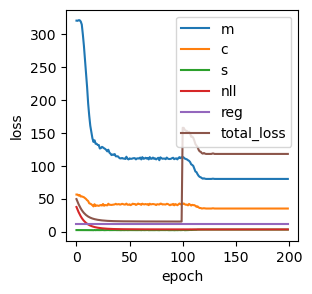

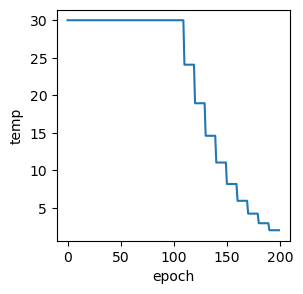

09:28:30 INFO

U > 0.05

09:28:30 INFO
                               norm  BRAF p.G469A  BRCA2 p.I1117V  \
left kidney hilar lymph node  0.485         0.000           0.000   
right kidney hilar lymph node 0.700         0.111           0.000   
right perinephric lymph node  0.000         0.000           0.000   
right lung lower wedge        0.645         0.161           0.000   
left retrocrural lymph node   0.514         0.000           0.000   
left lung lower lobe          0.000         0.000           0.316   

                               ATRX p.N1753Vfs*6  PTPRS p.P450A  \
left kidney hilar lymph node               0.000          0.329   
right kidney hilar lymph node              0.182          0.000   
right perinephric lymph node               0.000          0.405   
right lung lower wedge                     0.185          0.000   
left retrocrural lymph node                0.000          0.467   
left lung lower lobe                       0.000          0.000   

       

Time elapsed: 9.355601
tensor([[0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 

TypeError: all() received an invalid combination of arguments - got (out=NoneType, axis=NoneType, ), but expected one of:
 * ()
 * (int dim, bool keepdim)
      didn't match because some of the keywords were incorrect: out, axis
 * (name dim, bool keepdim)
      didn't match because some of the keywords were incorrect: out, axis


In [4]:
# Get all patients
import pandas as pd
patients = set()
for file in os.listdir(PAIRTREE_TREES_DIR):
    if "results.npz" in file:
        patients.add(file.split(".")[0])
print(f"{len(patients)} patients")
patients=["H135089"]
for patient in patients:
    space = "x"*45
    print(f"{space} PATIENT {patient} {space}")
    df = pd.read_csv(os.path.join(GUNDEM_DATA_DIR, f"{patient}_SNVs.tsv"), delimiter="\t")
    primary_sites = list(df[df['tumor_type']=='primary_disease']['#sample_index'].unique())
    if len(primary_sites) > 1:
        # TODO: figure out how to handle this
        print(f"skipping patient {patient} with multiple primaries")
        continue
    primary_site = list(df[df['tumor_type']=='primary_disease']['anatomical_site_label'].unique())[0]
    print(f"Primary site: {primary_site}")
    find_labeling(os.path.join(GUNDEM_DATA_DIR, f"{patient}_SNVs.tsv"), 
              os.path.join(PAIRTREE_TREES_DIR, f"{patient}.results.npz"),
              custom_colors, primary_site)
    

[[1. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 0. 1.]]


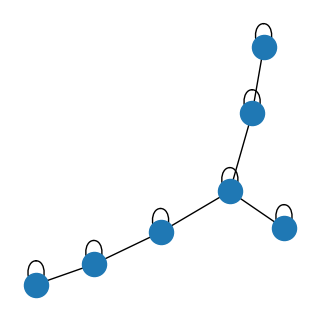

In [11]:
import numpy as np
results = np.load(os.path.join(PAIRTREE_TREES_DIR, f"H135089.results.npz"))

def convert_parents_to_adjmatrix(parents):
    K = len(parents) + 1
    adjm = np.eye(K)
    adjm[parents,np.arange(1, K)] = 1
    return adjm
A = convert_parents_to_adjmatrix(results['struct'][0])
print(A)
G = nx.from_numpy_matrix(A)
nx.draw(G)

In [8]:
A2 = pt_util.get_adj_matrix_from_parents(results['struct'][0])
A2

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0]])

In [ ]:
patient = "H132374_CNS_met"
primary_site = "retroperitoneal"
find_labeling(os.path.join(GUNDEM_DATA_DIR, f"{patient}_SNVs.tsv"), 
              os.path.join(PAIRTREE_TREES_DIR, f"{patient}.results.npz"),
              custom_colors, primary_site)


In [ ]:
patient = "H103207"
primary_site = "left adrenal"
find_labeling(os.path.join(GUNDEM_DATA_DIR, f"{patient}_SNVs.tsv"), 
              os.path.join(PAIRTREE_TREES_DIR, f"patient{patient}.results.npz"),
              custom_colors, primary_site)
                                                                                 